## **机器学习入门——逻辑分类**

In [1]:
from collections import OrderedDict
import pandas as pd
examDict={
    '学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,
            2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
    '通过考试':[0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]
}
examOrderDict=OrderedDict(examDict)
examDf=pd.DataFrame(examOrderDict)
examDf.head()

,学习时间,通过考试
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


## **提取特征和标签**

In [3]:
exam_x=examDf.loc[:,'学习时间']
exam_y=examDf.loc[:,'通过考试']

## **绘制散点图**

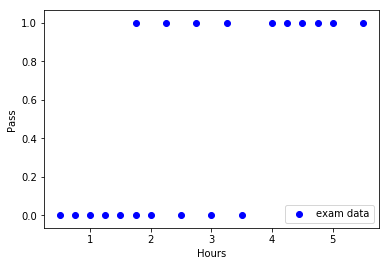

In [8]:
import matplotlib.pyplot as plt
plt.scatter(exam_x, exam_y, color="b", label="exam data")#散点图
plt.xlabel("Hours")#添加图标标签
plt.ylabel("Pass")
plt.legend(loc=4)
plt.show()#显示图像

## **建立训练数据集和测试数据集**

### **train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取训练数据（train）和测试数据（test）**
第一个参数：所要划分的样本特征
第2个参数：所要划分的样本标签
train_size：训练数据占比，如果是整数的话就是样本的数量

## **训练模型，使用训练数据（同简单线性回归，先要转换数组形状）**

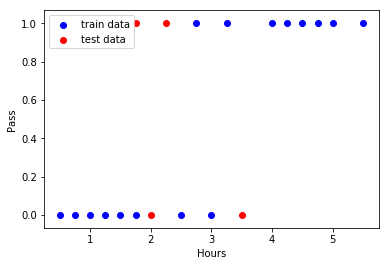

In [20]:
from sklearn.cross_validation import train_test_split
X_train , X_test , y_train , y_test = train_test_split(exam_x ,
                                                       exam_y ,
                                                       train_size = 0.8)
#绘制散点图
import matplotlib.pyplot as plt

#散点图
plt.scatter(X_train, y_train, color="blue", label="train data")
plt.scatter(X_test, y_test, color="red", label="test data")

#添加图标标签
plt.legend(loc=2)
plt.xlabel("Hours")
plt.ylabel("Pass")
#显示图像
plt.show()

In [18]:
import numpy as np


In [21]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## **模型评估**

In [23]:
#评估模型：准确率
model.score(X_test , y_test)

0.5

## 获取概率值
### **第1个值是标签为0的概率值，第2个值是标签为1的概率值**

In [24]:
model.predict_proba(5)

array([[ 0.12339915,  0.87660085]])

### **预测数据：使用模型的predict方法可以进行预测。这里我们输入学生的特征学习时间5小时，模型返回结果标签是1，就代表预测该学生通过考试。**


In [27]:
pred=model.predict([[5]])
print(pred)

[1]


## 理解逻辑回归函数
斜率slope
截距intercept

In [29]:
#第1步：得到回归方程的z值
#回归方程：z=𝑎+𝑏x
#截距
a=model.intercept_
#回归系数
b=model.coef_

x=5
z=a+b*x

#第2步：将z值带入逻辑回归函数中，得到概率值
y_pred=1/(1+np.exp(-z))
print('预测的概率值：',y_pred)

预测的概率值： [[ 0.87660085]]


第1步：得到回归方程的z值
回归方程：z=𝑎+𝑏x
截距
回归系数
第2步：将z值带入逻辑回归函数中，得到概率值
y_pred=1/(1+np.exp(-z))